In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [323]:
df = pd.read_csv('Titanic-Dataset.csv')

In [324]:
df.shape

(891, 12)

In [325]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [327]:
#Drop columns
df.drop(columns=['Cabin'],inplace=True)

In [328]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [329]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [330]:
#fill missing value
df['Embarked'].fillna('S',inplace=True)

C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\1766814263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [331]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

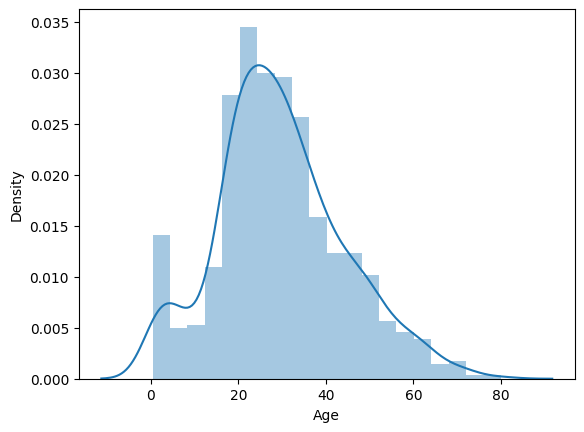

In [332]:
sns.distplot(df['Age'])

In [333]:
# fill age value by mean dtd

df_age = np.random.randint(df['Age'].mean()- df['Age'].std(),df['Age'].mean() + df['Age'].std(),177)

In [334]:
# fill sge missing value by rh df_age
df['Age'][df['Age'].isnull()]= df_age

C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\2802988604.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age'][df['Age'].isnull()]= df_age
C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\2802988604.py:2: SettingWithCopyWarning: 


In [335]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

In [336]:
df[df['Pclass'] == 1]['Survived'].value_counts()

Survived
1    136
0     80
Name: count, dtype: int64

In [337]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [338]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [339]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\1547070618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 0])
C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\1547070618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 1])


<Axes: xlabel='Age', ylabel='Density'>

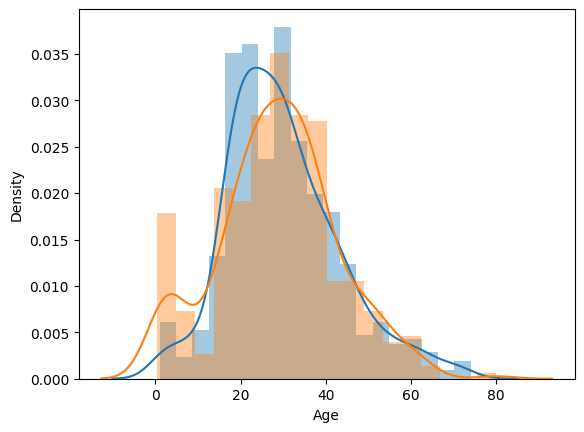

In [340]:
sns.distplot(df['Age'][df['Survived'] == 0])
sns.distplot(df['Age'][df['Survived'] == 1])

C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\22600210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived'] == 0])
C:\Users\kapil\AppData\Local\Temp\ipykernel_4540\22600210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived'] == 1])


<Axes: xlabel='Fare', ylabel='Density'>

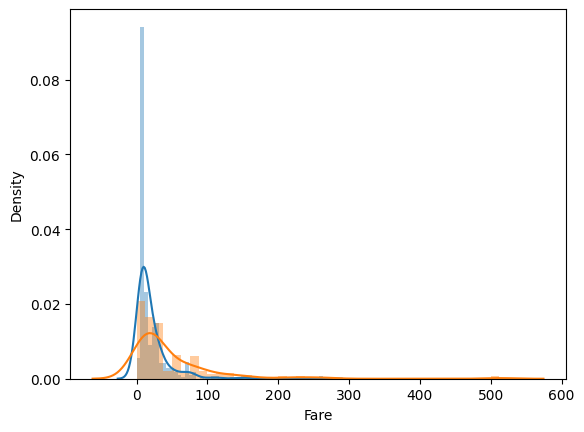

In [341]:
sns.distplot(df['Fare'][df['Survived'] == 0])
sns.distplot(df['Fare'][df['Survived'] == 1])

In [342]:
df.drop(columns=['Ticket'],inplace=True)

In [343]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [344]:
df['family'] = df['SibSp'] + df['Parch'] + 1

In [345]:
df.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [346]:
## distribute the family into the 3 part

def cel(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [347]:
df['family_size'] = df['family'].apply(cel)

In [348]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [349]:
df['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [350]:
df.drop(columns=['SibSp','Parch','family'],inplace=True)

In [351]:
passengerID = df['PassengerId'].values

In [352]:
df.drop(columns=['Name','PassengerId'],inplace=True)

In [353]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   family_size  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [355]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [356]:
## distribute the columns into the multiple columns

df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [357]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Fare                891 non-null    float64
 3   Pclass_2            891 non-null    bool   
 4   Pclass_3            891 non-null    bool   
 5   Sex_male            891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   family_size_Large   891 non-null    bool   
 9   family_size_Medium  891 non-null    bool   
dtypes: bool(7), float64(2), int64(1)
memory usage: 27.1 KB


In [359]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Survived            891 non-null    int64
 1   Age                 891 non-null    int32
 2   Fare                891 non-null    int32
 3   Pclass_2            891 non-null    int32
 4   Pclass_3            891 non-null    int32
 5   Sex_male            891 non-null    int32
 6   Embarked_Q          891 non-null    int32
 7   Embarked_S          891 non-null    int32
 8   family_size_Large   891 non-null    int32
 9   family_size_Medium  891 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 38.4 KB


In [552]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
df['Pclass_2'] = df['Pclass_2'].astype(int)
df['Pclass_3'] = df['Pclass_3'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df['family_size_Large'] = df['family_size_Large'].astype(int)
df['family_size_Medium'] = df['family_size_Medium'].astype(int)

## Model

In [553]:
X = df.drop(columns=['Survived','Fare'],axis=1)
y = df['Survived']

In [554]:
X

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,22,0,1,1,0,1,0,1
1,38,0,0,0,0,0,0,1
2,26,0,1,0,0,1,0,0
3,35,0,0,0,0,1,0,1
4,35,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
886,27,1,0,1,0,1,0,0
887,19,0,0,0,0,1,0,0
888,42,0,1,0,0,1,0,1
889,26,0,0,1,0,0,0,0


In [555]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [556]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [557]:
print(X_train.shape)
print(y_train.shape)

(712, 8)
(712,)


In [582]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

classifier = RandomForestClassifier(max_depth=4,random_state=0)
classifier1 = DecisionTreeClassifier(max_depth=5)
classifier2 = LogisticRegression()

In [583]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [584]:
classifier1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [585]:

classifier2.fit(X_train,y_train)

C:\Users\kapil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [588]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_test)
y_pred2 = classifier.predict(X_test)

In [589]:
from sklearn.metrics import accuracy_score


In [590]:
print("RandomForestClassifier:",accuracy_score(y_pred,y_test))

RandomForestClassifier: 0.8324022346368715


In [591]:
print("DecisionTreeClassifier:",accuracy_score(y_pred,y_test))

DecisionTreeClassifier: 0.8324022346368715


In [592]:

print("LogisticRegression:",accuracy_score(y_pred2,y_test))

LogisticRegression: 0.8324022346368715
